# Time Series Analysis

## 1. Plot the data with proper labeling and make some observations on the graph.


In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load data
data = pd.read_csv('us_retail_sales.csv')

In [3]:
# display data
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [4]:
# data preprocessing 

# Melt the data into a long format
data_processed = data.melt(id_vars=['YEAR'], var_name='MONTH', value_name='SALES')

# Convert YEAR and MONTH into a datetime object
data_processed['DATE'] = pd.to_datetime(data_processed['YEAR'].astype(str) + data_processed['MONTH'], format='%Y%b')

# Sort by date
data_processed = data_processed.sort_values('DATE')


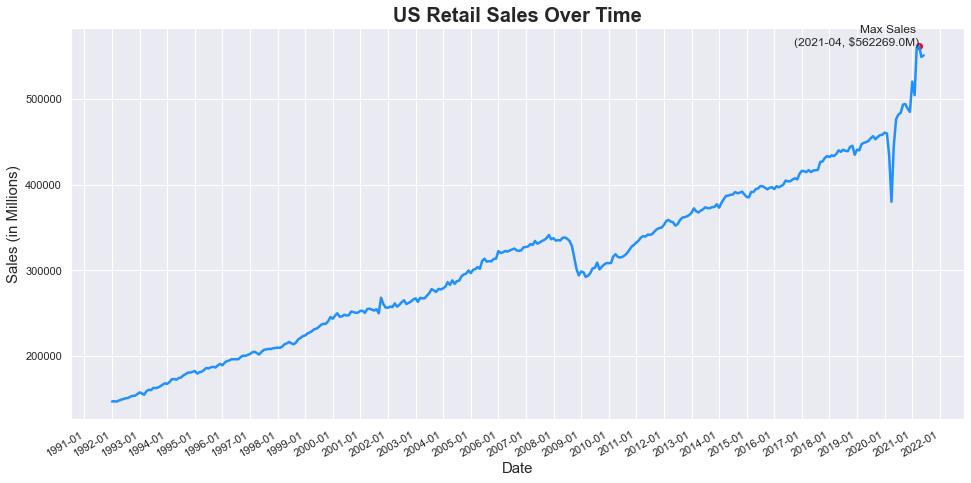

In [5]:
import seaborn as sns
import matplotlib.dates as mdates

# Set the style
sns.set_theme(style="darkgrid")

# Increase the size of the figure
plt.figure(figsize=(16, 8))

# Create the plot
plt.plot(data_processed['DATE'], data_processed['SALES'], color='dodgerblue', linewidth=2.5)

# Set the title and labels
plt.title('US Retail Sales Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sales (in Millions)', fontsize=15)

# Formatting the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotating date labels automatically
plt.gcf().autofmt_xdate()

# Highlight the highest point in the plot
max_sale = data_processed['SALES'].max()
max_date = data_processed['DATE'][data_processed['SALES'].idxmax()]
plt.scatter(max_date, max_sale, color='red')
plt.text(max_date, max_sale, f'Max Sales \n({max_date.strftime("%Y-%m")}, ${max_sale}M)', 
         fontsize=12, horizontalalignment='right')

# Create a grid
plt.grid(True)

# Show the plot
plt.show()


## 2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [6]:
# Train-test split
train = data_processed[data_processed['DATE'] < '2020-07-01']
test = data_processed[data_processed['DATE'] >= '2020-07-01']


In [7]:
# show the train data
train.head()

,YEAR,MONTH,SALES,DATE
0,1992,JAN,146925.0,1992-01-01
30,1992,FEB,147223.0,1992-02-01
60,1992,MAR,146805.0,1992-03-01
90,1992,APR,148032.0,1992-04-01
120,1992,MAY,149010.0,1992-05-01


In [8]:
# show the test data
test.head()

,YEAR,MONTH,SALES,DATE
208,2020,JUL,481627.0,2020-07-01
238,2020,AUG,483716.0,2020-08-01
268,2020,SEP,493327.0,2020-09-01
298,2020,OCT,493991.0,2020-10-01
328,2020,NOV,488652.0,2020-11-01


In [9]:
# Check for NaN or Inf in the test dataset
test['SALES'].fillna(test['SALES'].mean(), inplace=True)

## 3.Use the training set to build a predictive model for the monthly retail sales.

In [12]:
# i am using a SARIMAX model here as it's suitable for seasonal time series data.
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define the model
model = SARIMAX(train['SALES'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# Fit the model
model_fit = model.fit(disp=False)

## 4. Use the model to predict the monthly retail sales on the last year of data.

In [13]:
# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)


## 5. Report the RMSE of the model predictions on the test set.

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(test['SALES'], predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 50429.681
